In [1]:
import pandas as pd

In [2]:
london = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-darja-drozhzha-cal-d7a35/Statistics + python/london.csv')
london

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [3]:
london.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [4]:
london["timestamp"] = pd.to_datetime(london["timestamp"])

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

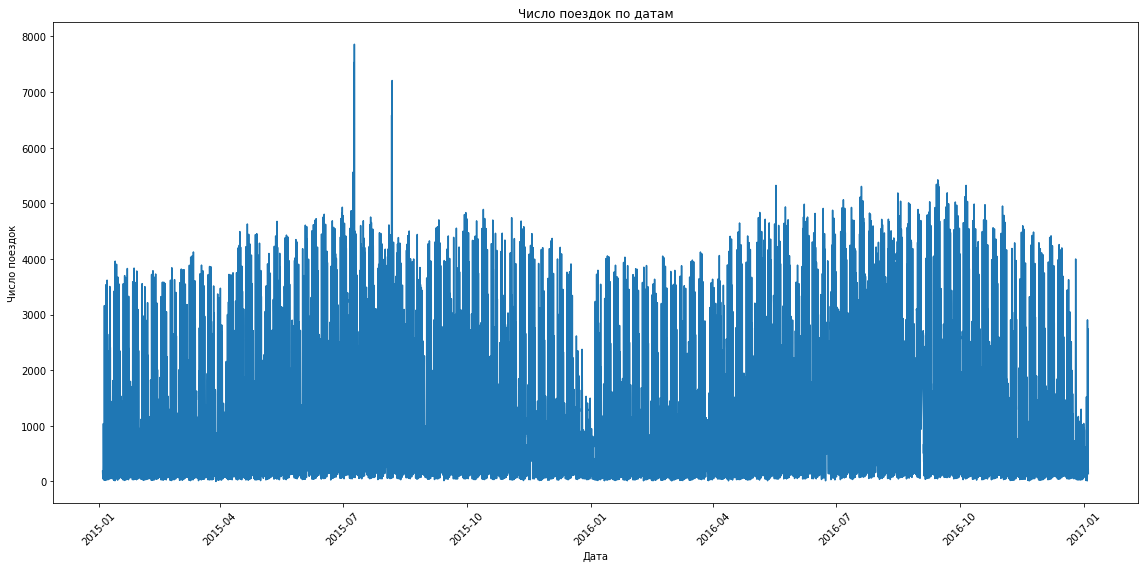

In [6]:
plt.figure(figsize=(16,8))
sns.lineplot(data=london, x='timestamp', y='cnt')

plt.title('Число поездок по датам')
plt.xlabel('Дата')
plt.ylabel('Число поездок')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
london = london.set_index("timestamp")

In [8]:
london_daily = london.resample('D').agg({'cnt': 'sum'})

In [9]:
london = london.reset_index()

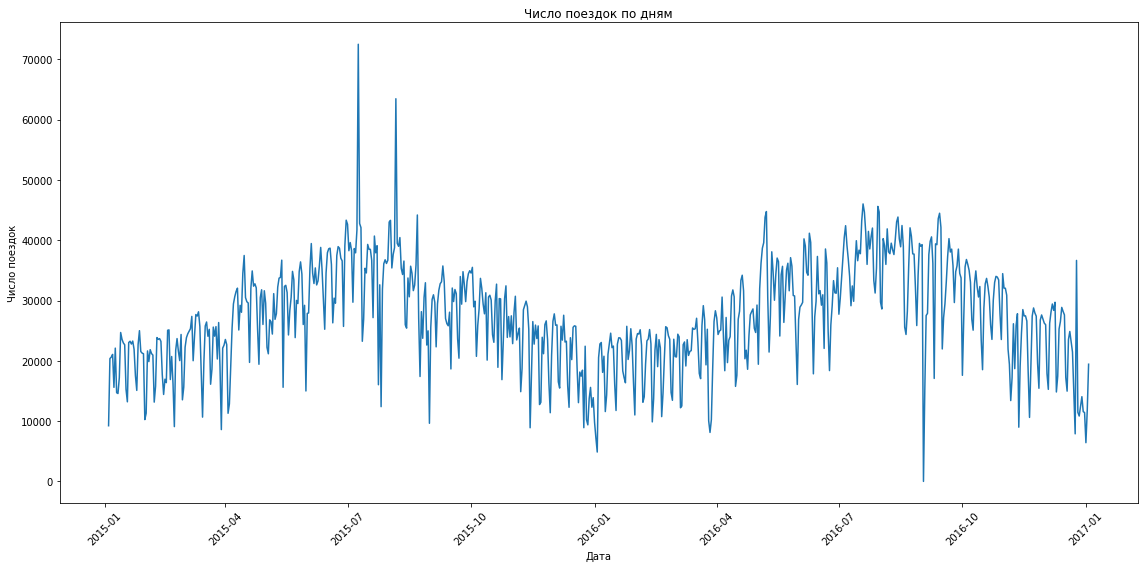

In [10]:
plt.figure(figsize=(16,8))
sns.lineplot(data=london_daily, x=london_daily.index, y='cnt')

plt.title('Число поездок по дням')
plt.xlabel('Дата')
plt.ylabel('Число поездок')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
london_daily['roll'] = london_daily['cnt'].rolling(window=3).mean()

In [14]:
value_on_2015_07_09 = london_daily.loc['2015-07-09', 'roll']

In [15]:
value_on_2015_07_09

50705.0

In [19]:
import numpy as np
difference = london_daily['cnt'] - london_daily['roll']
std_deviation = np.std(difference, ddof=0)

In [20]:
std_deviation

4558.58664111794

In [26]:
london_daily['upper_bound'] = london_daily['roll'] + 2.576 * std_deviation
london_daily['lower_bound'] = london_daily['roll'] - 2.576 * std_deviation

In [27]:
london_daily

,cnt,roll,upper_bound,lower_bound
timestamp,,,,
2015-01-04,9234,NaN,NaN,NaN
2015-01-05,20372,NaN,NaN,NaN
2015-01-06,20613,16739.666667,28482.585854,4996.747479
2015-01-07,21064,20683.000000,32425.919188,8940.080812
2015-01-08,15601,19092.666667,30835.585854,7349.747479
...,...,...,...,...
2016-12-30,11566,12682.000000,24424.919188,939.080812
2016-12-31,11424,12347.333333,24090.252521,604.414146
2017-01-01,6421,9803.666667,21546.585854,-1939.252521


In [28]:
upper_bound_last = london_daily['upper_bound'].iloc[-1]

In [29]:
upper_bound_last_rounded = round(upper_bound_last, 2)

In [30]:
upper_bound_last_rounded

24302.92

In [31]:
london_daily.query("cnt > upper_bound")

,cnt,roll,upper_bound,lower_bound
timestamp,,,,
2015-07-09,72504,50705.000000,62447.919188,38962.080812
2015-08-06,63468,46627.333333,58370.252521,34884.414146
2016-09-04,27512,14259.000000,26001.919188,2516.080812
2016-12-25,36653,19650.666667,31393.585854,7907.747479


In [34]:
london_daily.query("cnt < lower_bound")

,cnt,roll,upper_bound,lower_bound
timestamp,,,,
2015-05-14,15609,28709.333333,40452.252521,16966.414146
2015-07-12,23240,36036.666667,47779.585854,24293.747479
2015-07-24,16034,31013.666667,42756.585854,19270.747479
2015-08-24,17400,29529.333333,41272.252521,17786.414146
2015-11-14,8898,21037.333333,32780.252521,9294.414146
2016-09-02,0,26086.333333,37829.252521,14343.414146
2016-09-10,17080,31262.000000,43004.919188,19519.080812
2016-09-16,21967,36193.333333,47936.252521,24450.414146
2016-11-12,8990,20878.000000,32620.919188,9135.080812
